In [1]:
#Summary of the project

#IBM has collected information on employee satisfaction, income, seniority and other factors.  The dataset indicates
#if there is attrition or not.
# We will use Ensemble techniques to predict the attrition

In [2]:
#We follow the below steps to arrive at the right model for prediction
# 1. EDA
# 2. Feature engineering
# 3. Modelling
# 4. Hyperparameter tuning
# 5. Finalizing the model

In [3]:
# 1. EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

input_df=pd.read_csv('../WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
input_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
input_df.shape

(1470, 35)

In [6]:
# The dataset has 1470 rows and 35 columns
# Lets check if there are any null values in the data set
input_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# The dataset has no null values
# Lets analyze the types now
input_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
input_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
# Above result shows that there are 3 columns which have only 1 unique value.  So these may not be use for us
# Columns which are not of any use to use are: StandardHours, Over18 and EmployeeCount

In [10]:
# Now lets check if the dataset is balanced or not
input_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
#Above result shows that the dataset is not balanced
#Lets do a bit of skewing

In [12]:
input_df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [13]:
# Many columns have very high skewness.  This needs to be handled
input_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
#Inference
# 1. All columns seem to have 1470 entries, which means there are no missing entries
# 2. Data is not normally distributed since mean is not equal to median (50%)
# 3. Outliers are quite high since min, max and difference between each quarter have large differences

No     1233
Yes     237
Name: Attrition, dtype: int64

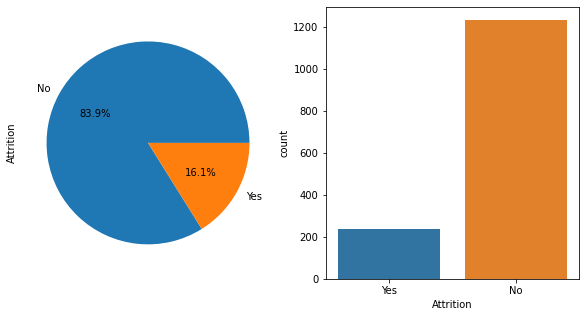

In [15]:
#Lets find out the attrition through labels
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
input_df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['Attrition'])
input_df['Attrition'].value_counts()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

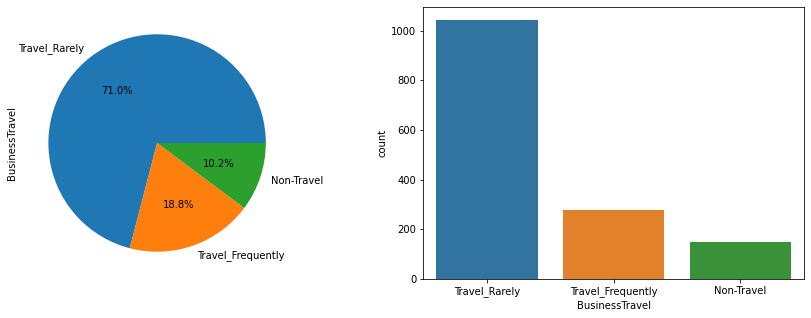

In [16]:
#Label class has only 16.1% yes and 83.9% no, which makes it very difficult to analyze the reason for attrition
#Now lets focus on categories and see perform analysis on the available dataset

#Lets take Business Travel for analysis
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['BusinessTravel'])

In [17]:
#As seen above, Majority - 71% Travel rarely, 18.8% travel frequently and 10.2% are non travellers (quite less)

<AxesSubplot:xlabel='Department', ylabel='count'>

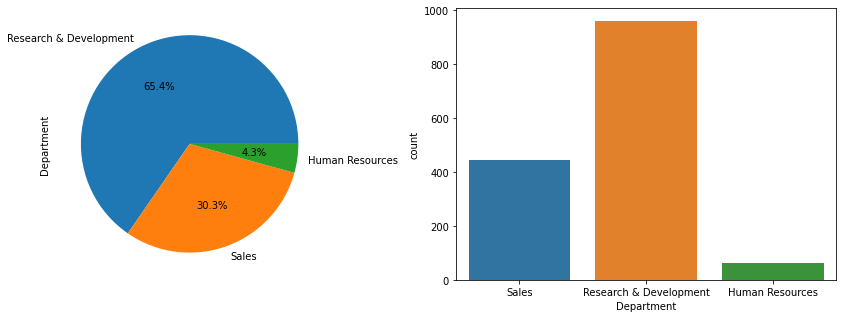

In [18]:
#Now lets analyze the Department
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['Department'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['Department'])


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

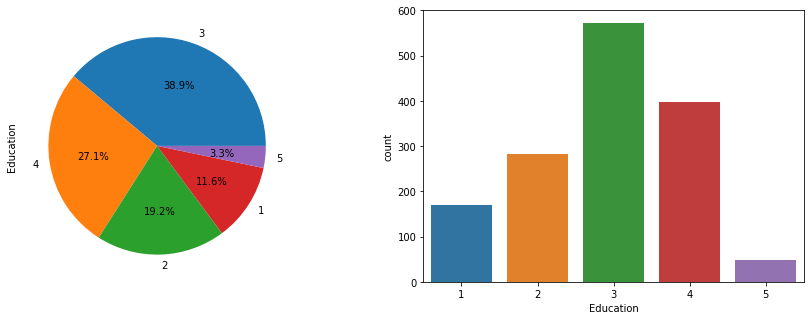

In [19]:
#The above analysis shows that there are 3 departments in the company.  Majority work in R&D and a minor portion in HR

#Lets analyze the Education

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['Education'])
input_df['Education'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

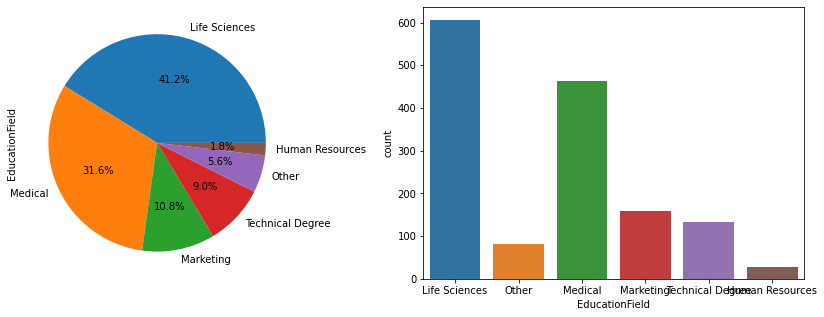

In [20]:
#Above analysis shows that there are 5 types of Education levels.  Majority fall under the type 3 and only 3.3% hold
# the highest education level

#Lets analyze EducationField
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['EducationField'])
input_df['EducationField'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

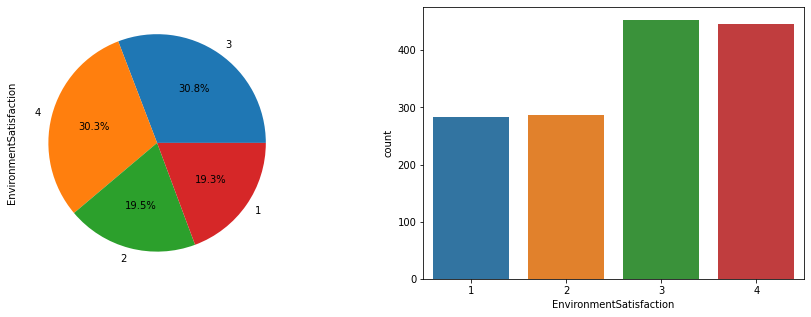

In [21]:
#From the above analysis, it appears that majority are from Life Sciences Education (41.2%) and minimum is in HR (1.8%)
#Medical also contains significant employees whereas other categories constitute 5.6%.

#Lets analyze the EnvironmentSatisfaction
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['EnvironmentSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['EnvironmentSatisfaction'])
input_df['EnvironmentSatisfaction'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

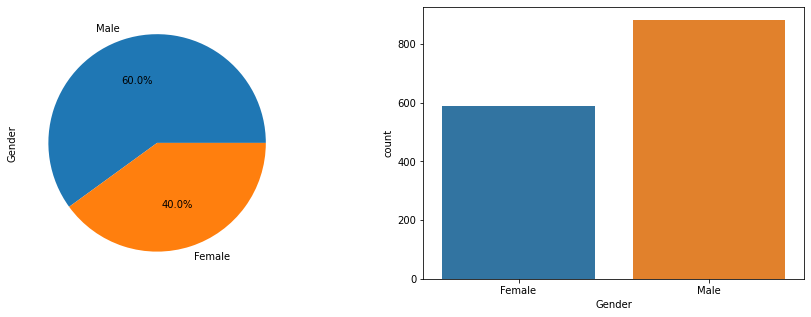

In [22]:
#Above analysis shows that there are 4 types of levels categorizing satisfaction, 4 being the highest
# we see that Majority of employees (3 & 4) do have Environment Satisfaction
# However, we see around 284 employees not satisifed with Environment

#Lets analyze Gender
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['Gender'])
input_df['Gender'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

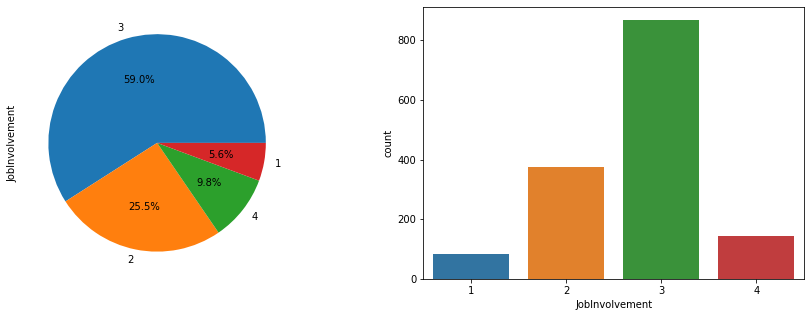

In [23]:
#Above shows that majority of employees are Male.  Male:Female ration is 3:2

#Lets analyze JobInvolvement
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['JobInvolvement'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['JobInvolvement'])
input_df['JobInvolvement'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

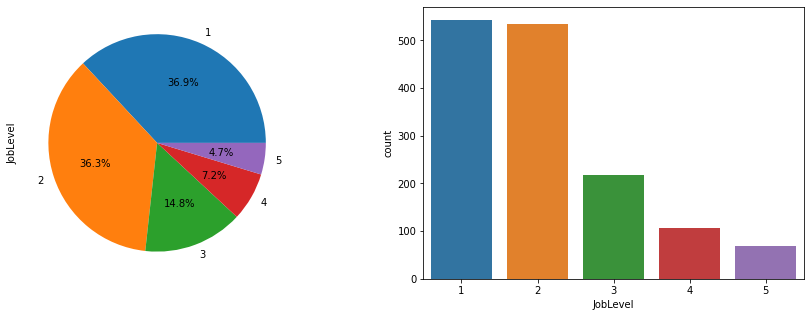

In [24]:
#Above shows that Type 3 shows major job involvement compared to other types.  Type 1 shows minimal job involvement

#Lets analyze JobLevel
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['JobLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['JobLevel'])
input_df['JobLevel'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

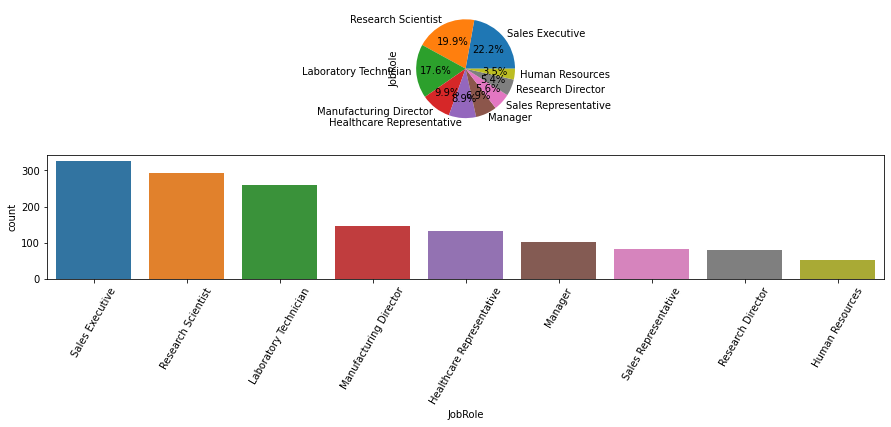

In [25]:
#Above shows that there are majority of employees at Level 1 (may be entry / junior positions) and less number in Level 5
# (obviously Senior management)

#Lets analyze JobRole
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
input_df['JobRole'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=30)
plt.subplot(2,1,2)
sns.countplot(input_df['JobRole'])
plt.xticks(rotation=60)
input_df['JobRole'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

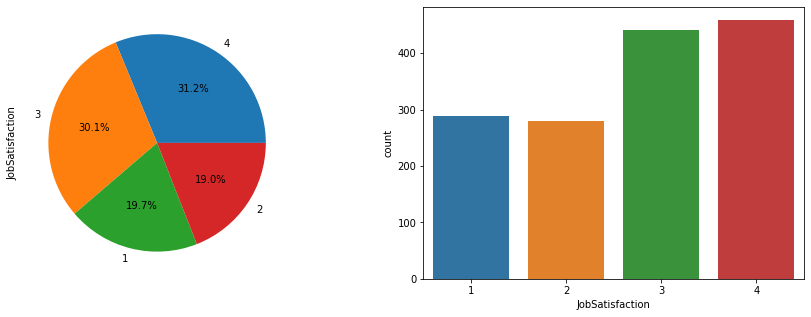

In [26]:
#Above analysis shows that there are 9 Job roles. Majority are Sales Executives and 3.5% are HR

#Lets analyze JobSatisfaction
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['JobSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['JobSatisfaction'])
input_df['JobSatisfaction'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

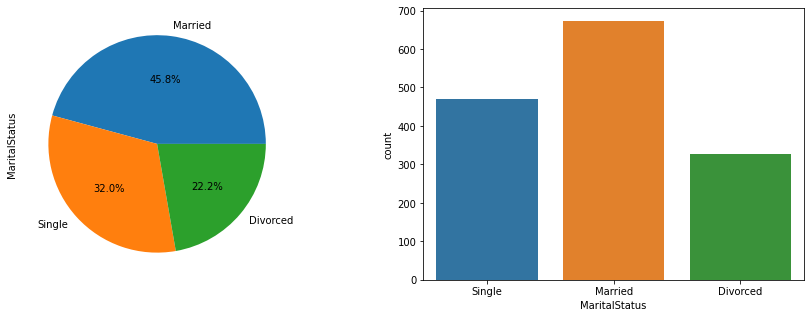

In [27]:
#Majority of them show high job satisfaction.  However there is close to 280 who have less job satisfaction and 289 who
# seem to also not have a high satisfaction

#Lets analyze MaritalStatus
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['MaritalStatus'])
input_df['MaritalStatus'].value_counts()


No     1054
Yes     416
Name: OverTime, dtype: int64

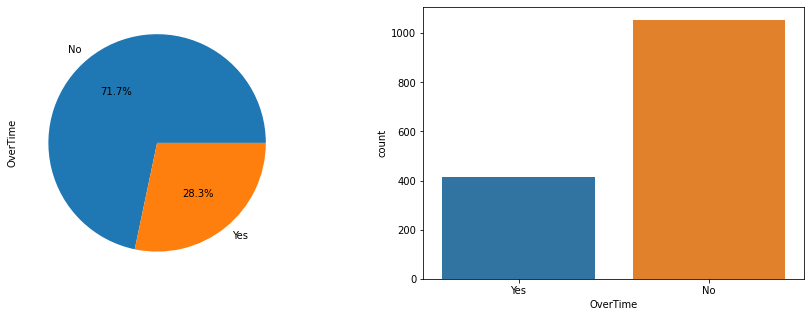

In [28]:
#Most of them are Married, significant amount who are single and a quite a good amount of divorced

#Lets analyze OverTime
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['OverTime'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['OverTime'])
input_df['OverTime'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

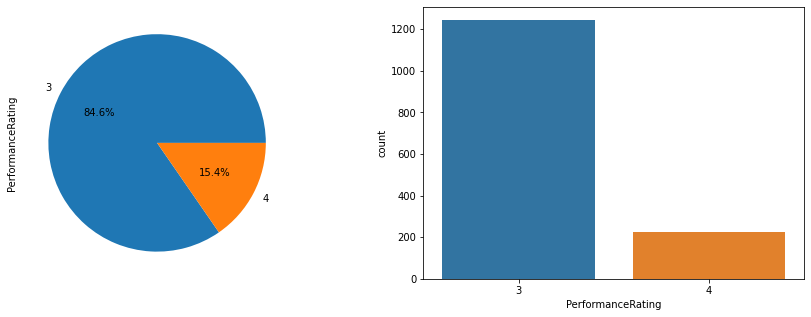

In [29]:
#Very less work overtime (28.3%)

#Lets analyze PerformanceRating
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['PerformanceRating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['PerformanceRating'])
input_df['PerformanceRating'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

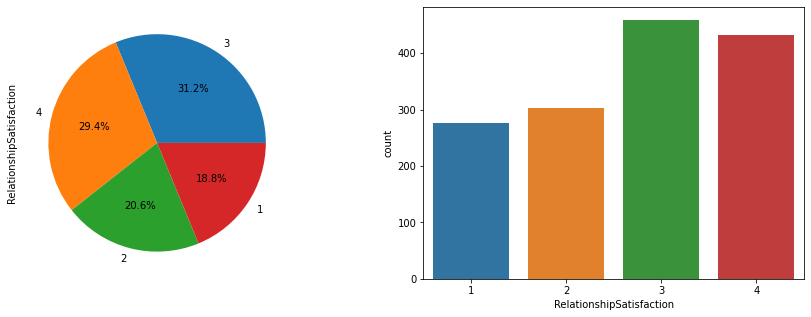

In [30]:
#Above shows that there are only 2 ratings which everyone falls into

#Lets analyze RelationshipSatisfaction
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['RelationshipSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['RelationshipSatisfaction'])
input_df['RelationshipSatisfaction'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

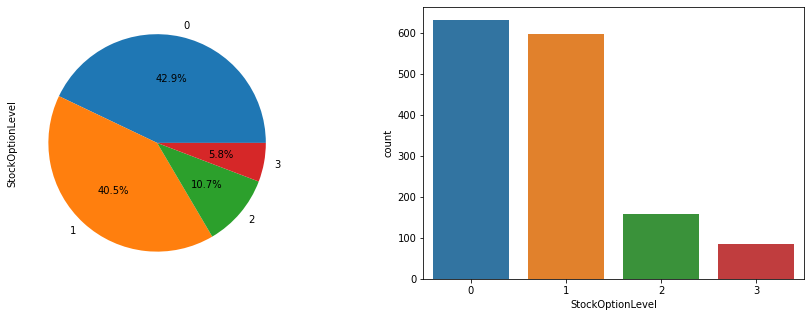

In [31]:
#Above shows that majority are satisfied with their relationship

#Lets analyze StockOptionLevel
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['StockOptionLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['StockOptionLevel'])
input_df['StockOptionLevel'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

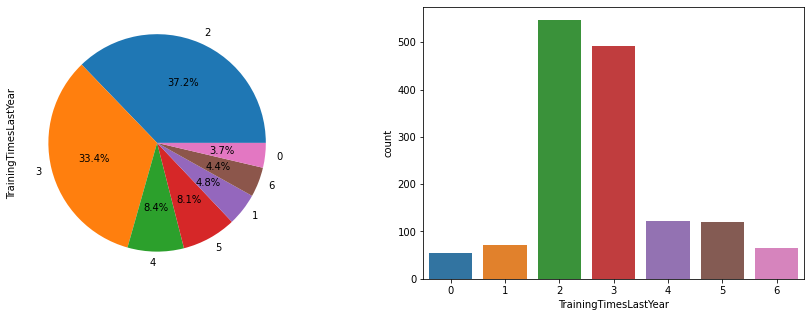

In [32]:
#Above shows that Majority of the employees hold no stocks while only very few hold high stocks

#Lets analyze TrainingTimesLastYear
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['TrainingTimesLastYear'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['TrainingTimesLastYear'])
input_df['TrainingTimesLastYear'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

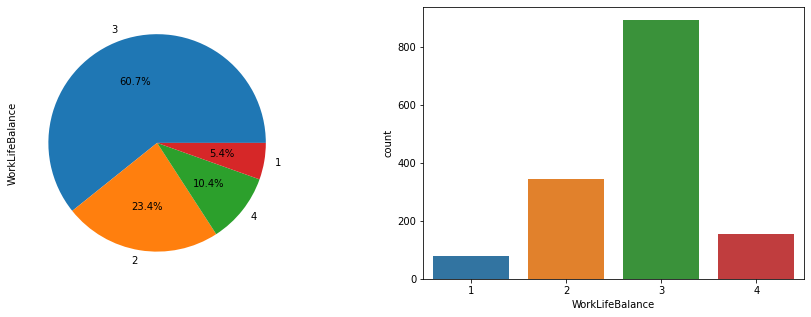

In [33]:
#Above shows that Majority of the employees train 2 or 3 times in an year.  Quite less who get no trained at all

#Lets analyze WorkLifeBalance
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
input_df['WorkLifeBalance'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(input_df['WorkLifeBalance'])
input_df['WorkLifeBalance'].value_counts()

Max 60
Min 18


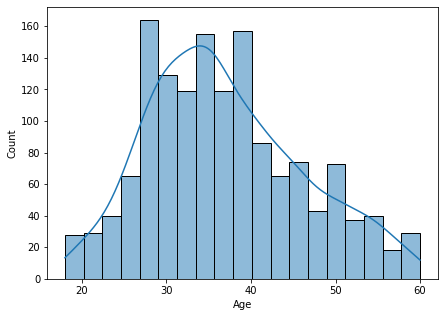

In [34]:
#Above shows that Majority of them are satisifed with the work life balance. High % observed at Level 3.  5.4% are not 
# maintaining their balance.  Only 10.4% have very high balance

#Lets analyze the age
plt.figure(figsize=(7,5))
sns.histplot(input_df['Age'],kde=True)
print('Max',input_df['Age'].max())
print('Min',input_df['Age'].min())

Maximum 1499
Minimum 102


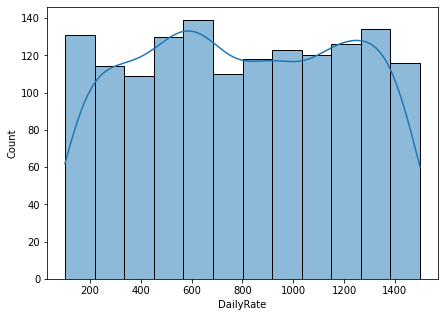

In [35]:
#Above shows that majority of employees are in the age range 28 - 40.  Youngest starts at 18 and retirement at 60

#Lets analyze the max and min dailyrate
plt.figure(figsize=(7,5))
sns.histplot(input_df['DailyRate'],kde=True)
print('Maximum',input_df['DailyRate'].max())
print('Minimum',input_df['DailyRate'].min())

Maximum 29
Minimum 1


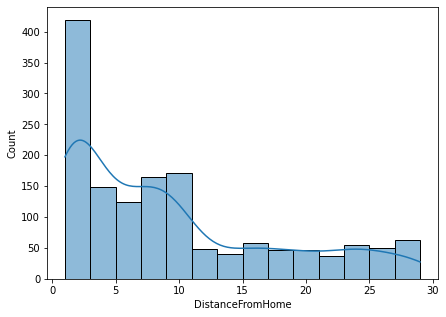

In [36]:
#Above shows that the dailyrate is evenly distributed.  Skewness is very less

#Lets analyze DistanceFromHome
plt.figure(figsize=(7,5))
sns.histplot(input_df['DistanceFromHome'],kde=True)
print('Maximum',input_df['DistanceFromHome'].max())
print('Minimum',input_df['DistanceFromHome'].min())

Maximum 100
Minimum 30


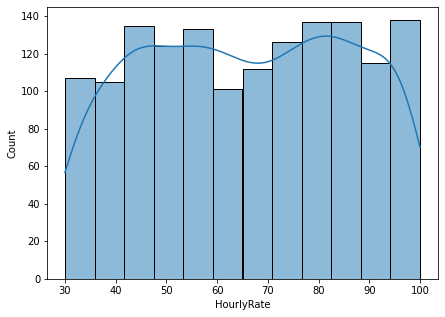

In [37]:
# Above shows that most of the employess live less than 5 Kms from office.  Data is highly skewed towards the right

#Lets analyze HourlyRate
plt.figure(figsize=(7,5))
sns.histplot(input_df['HourlyRate'],kde=True)
print('Maximum',input_df['HourlyRate'].max())
print('Minimum',input_df['HourlyRate'].min())

Maximum 19999
Minimum 1009


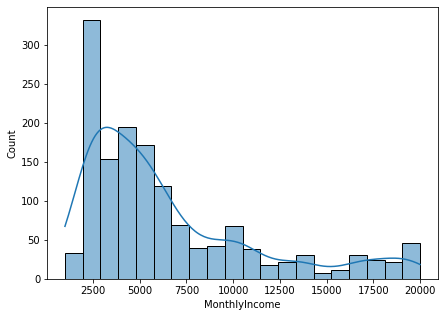

In [38]:
#Above shows that HourlyRate is quite even.  Pattern looks like Guassian

#Lets analyze MonthlyIncome
plt.figure(figsize=(7,5))
sns.histplot(input_df['MonthlyIncome'],kde=True)
print('Maximum',input_df['MonthlyIncome'].max())
print('Minimum',input_df['MonthlyIncome'].min())


In [39]:
#Above shows that majority get income around 2500.  Only around 50 get the highest monthly income.  Data appears
# to be highly skewed towards the right.  The monthly income range is betweeen 1009 to 19999


Maximum 26999
Minimum 2094


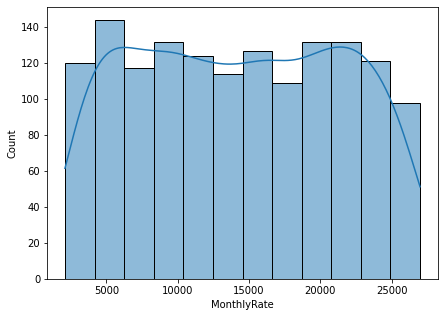

In [40]:
#Lets analyze MonthlyRate
plt.figure(figsize=(7,5))
sns.histplot(input_df['MonthlyRate'],kde=True)
print('Maximum',input_df['MonthlyRate'].max())
print('Minimum',input_df['MonthlyRate'].min())

In [41]:
#Above shows that monthlyrate is between 2094 - 26999. The variance observed is very less.  Skewness is less.  This means
#monthlyrate is quite balanced

Maximum 25
Minimum 11


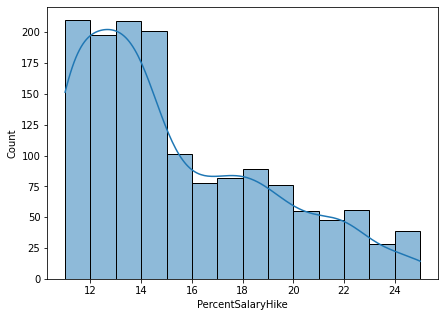

In [42]:
#Lets analyze PercentSalaryHike

plt.figure(figsize=(7,5))
sns.histplot(input_df['PercentSalaryHike'],kde=True)
print('Maximum',input_df['PercentSalaryHike'].max())
print('Minimum',input_df['PercentSalaryHike'].min())

In [43]:
#Above shows that the salary hike ranges between 11-25%.  Most of the employees get the hike between 11-15 %.  Very less
#numbers get around 22-24%.  Data is skewed towards the right meaning than mean is greater than median

Maximum 40
Minimum 0


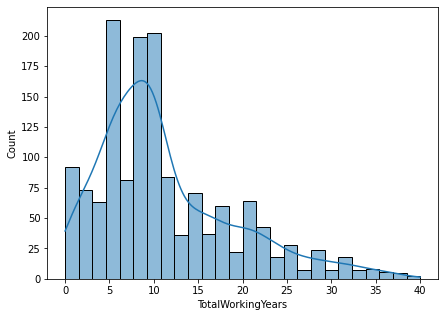

In [44]:
#Lets analyze TotalWorkingYears

plt.figure(figsize=(7,5))
sns.histplot(input_df['TotalWorkingYears'],kde=True)
print('Maximum',input_df['TotalWorkingYears'].max())
print('Minimum',input_df['TotalWorkingYears'].min())

In [45]:
#Above shows that majority of employees are tenured around 5-10 yrs.  Max tenure has been 40 yrs with very few falling
#in this category.  There is skewness towards the right

Maximum 40
Minimum 0


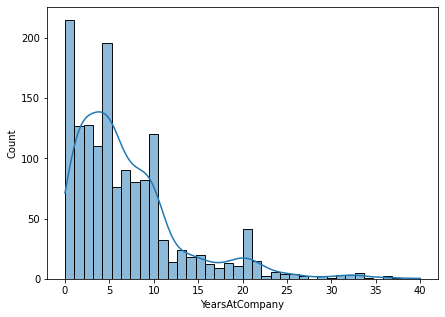

In [46]:
#Lets analyze YearsAtCompany
plt.figure(figsize=(7,5))
sns.histplot(input_df['YearsAtCompany'],kde=True)
print('Maximum',input_df['YearsAtCompany'].max())
print('Minimum',input_df['YearsAtCompany'].min())

In [47]:
#Above shows that maximum employees are new ones meaning less than 1 yr in the company.  Data is skewed towards right

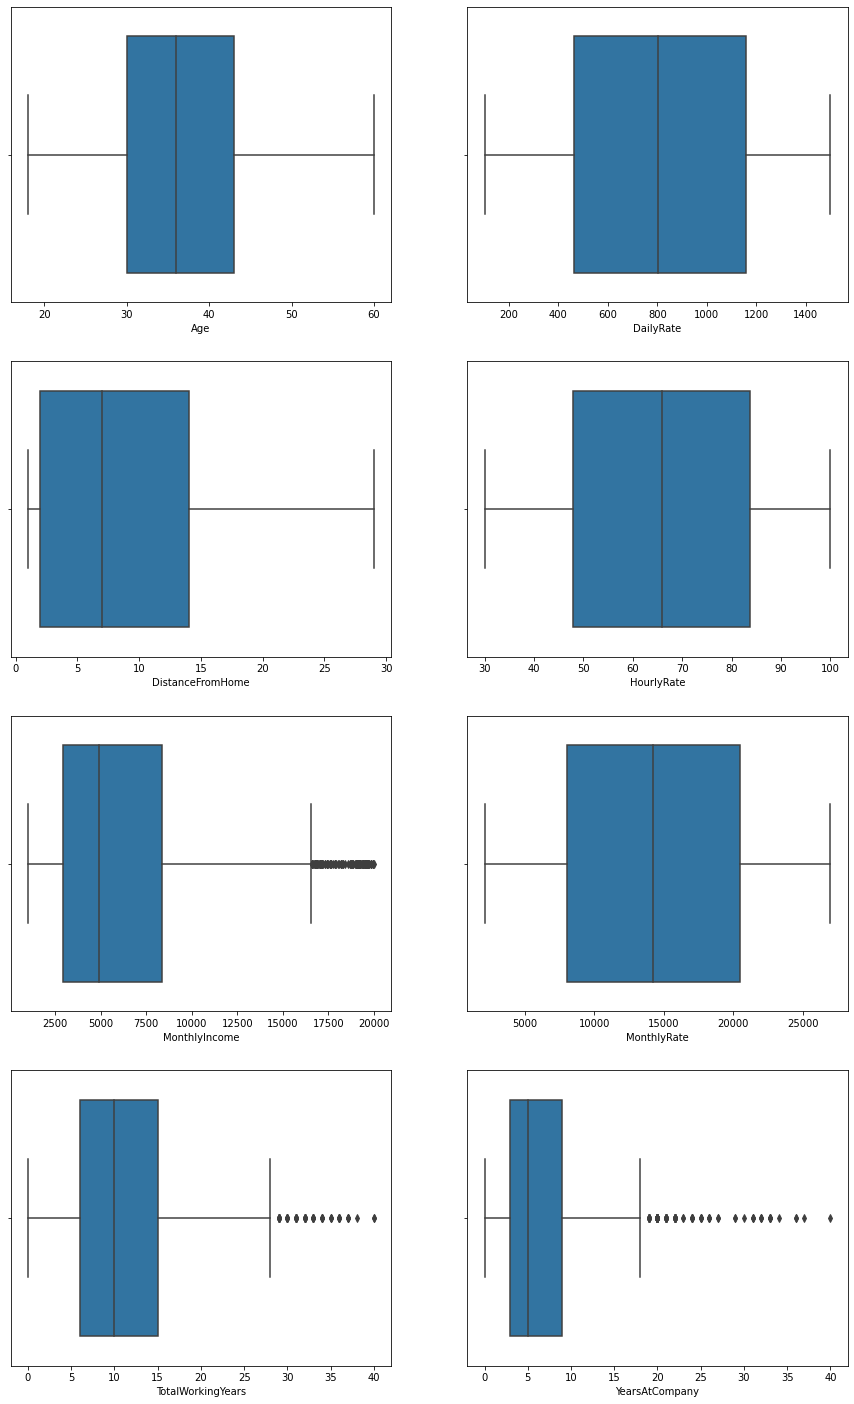

In [48]:
#Lets do a box plot of the continuous data to observe the outliers

continuous_data=[feature for feature in input_df.columns if input_df[feature].nunique()>20 and input_df[feature].nunique()<1470]

plot_fig,ax=plt.subplots(4,2,figsize=(15,25))
recur=0
cont=0
for i,n in enumerate(continuous_data):
    if i%2==0 and i>0:
        recur+=1
        cont=0
    sns.boxplot(input_df[n],ax=ax[recur,cont])
    cont+=1

In [49]:
#MonthlyIncome shows large number of outliers.  Other continuous data also show good amount of outliers 

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

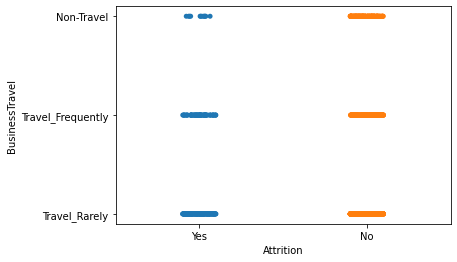

In [50]:
#Bivariate Analysis
#Lets perform Bivariate analysis for Attrition in relation to one other feature

#Lets peform Attrition with BusinessTravel
sns.stripplot(x='Attrition',y='BusinessTravel',data=input_df)

In [51]:
#Above shows that Attrition is more among the ones who Travel rarely

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

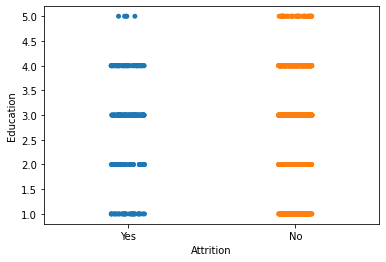

In [52]:
#Lets perform bivariate of Attrition with Education
sns.stripplot(x='Attrition',y='Education',data=input_df)

In [53]:
#Above shows that Attrition is more with highest level of Education

<AxesSubplot:xlabel='Attrition', ylabel='EducationField'>

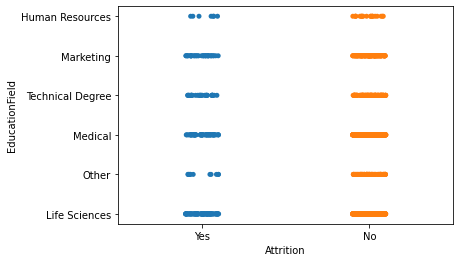

In [54]:
#Lets perform bivariate of Attrition with EducationField
sns.stripplot(x='Attrition',y='EducationField',data=input_df)

In [55]:
#Above shows that Employees in HR and Other tend to display higher attrition compared to other fields

<AxesSubplot:xlabel='Attrition', ylabel='Gender'>

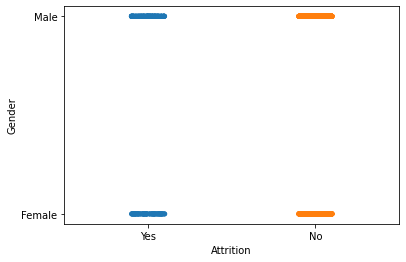

In [56]:
#Lets perform bivariate of Attrition with Gender
sns.stripplot(x='Attrition',y='Gender',data=input_df)

In [57]:
#Above shows that both Genders tend to show the same Attition levels.  No dependency identified

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

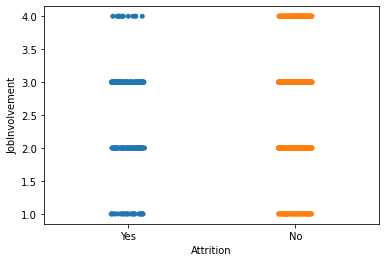

In [58]:
#Lets perform bivariate of Attrition with JobInvolvement
sns.stripplot(x='Attrition',y='JobInvolvement',data=input_df)

In [59]:
#Above shows that Attrition is high when JobInvolvement is either highest or lowest

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

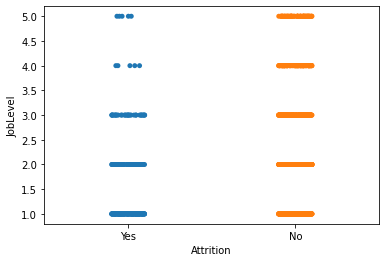

In [60]:
#Lets perform bivariate of Attrition with JobLevel
sns.stripplot(x='Attrition',y='JobLevel',data=input_df)

In [61]:
#Above shows that Attrition is high at Joblevels 4 and 5.  This means employees at higher job level tend to show more attrition

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

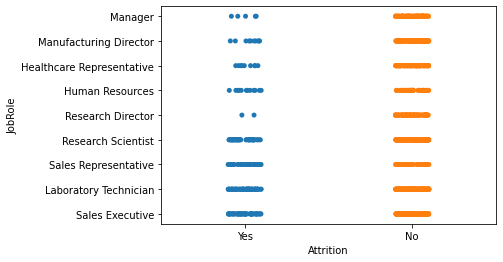

In [62]:
#Lets perform bivariate of Attrition with JobRole
sns.stripplot(x='Attrition',y='JobRole',data=input_df)

In [63]:
#Above shows highest attrition at Research Director role.  Managers and HR follow next.  After that comes Manufacturing Director
#and Healthcare as well

<AxesSubplot:xlabel='Attrition', ylabel='MaritalStatus'>

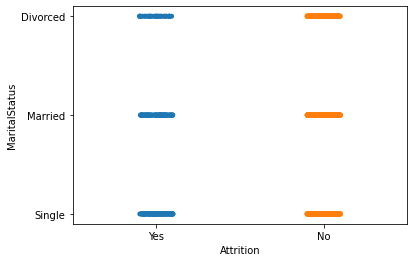

In [64]:
#Lets perform Bivariate of Attrition with MaritalStatus
sns.stripplot(x='Attrition',y='MaritalStatus',data=input_df)

In [65]:
#Above shows that Divorced are showing high attrition

<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

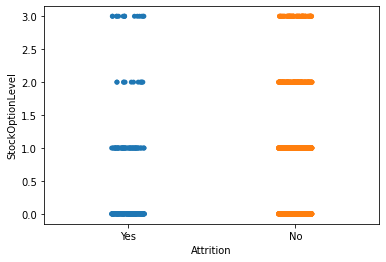

In [66]:
#Les perform bivariate of Attrition with StockOptionLevel
sns.stripplot(x='Attrition',y='StockOptionLevel',data=input_df)

In [67]:
#Above shows that employees with higher stockoptions tend to show more attrition

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

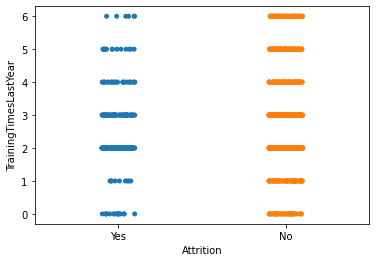

In [68]:
#Lets perform bivariate of Attrition and TrainingTimesLastYear
sns.stripplot(x='Attrition',y='TrainingTimesLastYear',data=input_df)

In [69]:
#Above shows that employees who are either trained extensively or very less last year tend to show more attrition

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

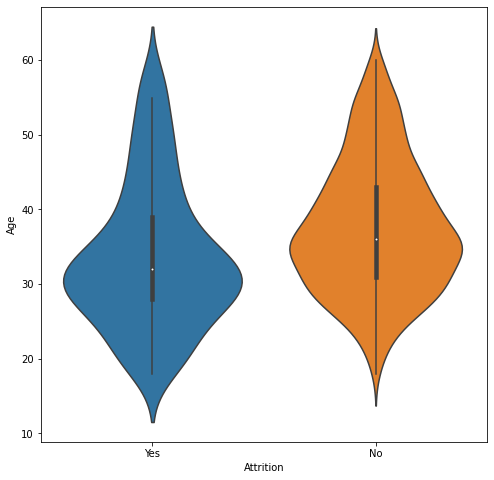

In [70]:
#Lets perform bivariate of Attrition and Age
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='Age',data=input_df)

In [71]:
#Above shows that employees aged between 26-33 yrs show more attrition compared to others

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

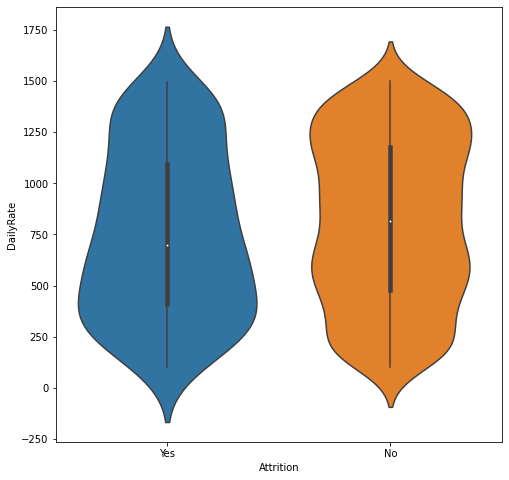

In [72]:
#Lets peform bivariate of Attrition and DailyRate
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='DailyRate',data=input_df)

In [73]:
#Above shows that employees with DailyRate between 250-400 show more attrition compared to others. In general, employees
#with less dailyrates show more attrition compared to ones with higher daily rates

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

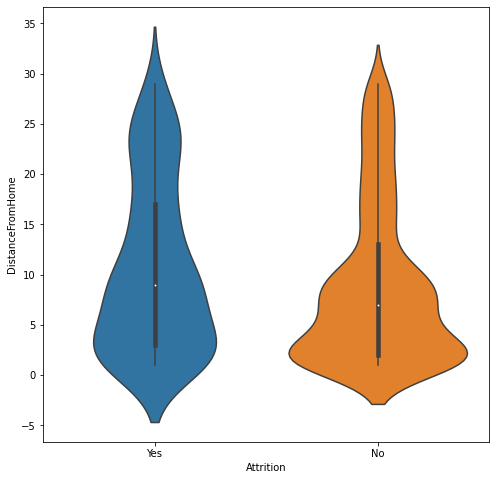

In [74]:
#Lets perform bivariate of Attrition and DistanceFromHome
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='DistanceFromHome',data=input_df)

In [75]:
#Above shows that employees who reside between 1-5 kms from office show higher attrition compared to the ones who stay far

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

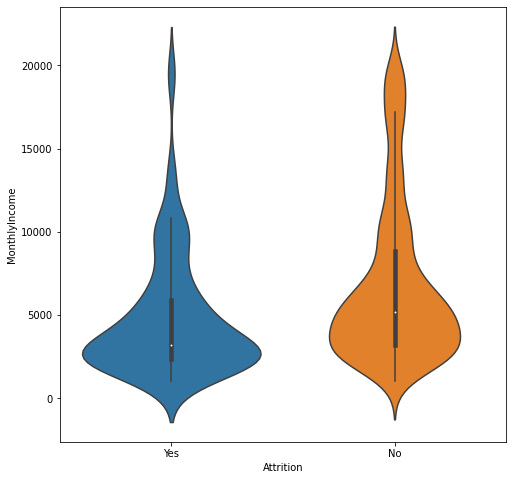

In [76]:
#Lets perform bivariate of Attrition and MontlyIncome
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='MonthlyIncome',data=input_df)

In [77]:
#Above shows that employees with monthly income below 5000 tend to show high attrition

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

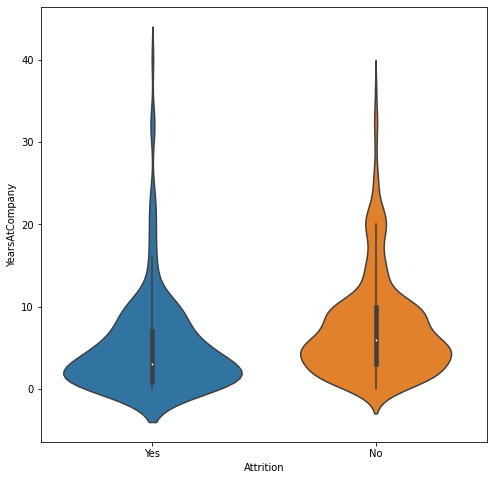

In [78]:
#Lets perform bivariate of Attrition with YearsAtCompany
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='YearsAtCompany',data=input_df)


In [79]:
#Above shows that attrition is more with lesser years at company

In [80]:
# Lets perform Multi-variate analysis as well.  We could try to perform for the below combinations
# 1. Age vs Joblevel on Attrition
# 2. Gender vs MonthlyIncome on Attrition
# 3. WorkLifeBalance vs MonthlyIncome on Atrrition
# 4. MaritalStatus vs MonthlyIncome on Attrition
# 5. Age vs MonthlyIncome on Attrition


<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

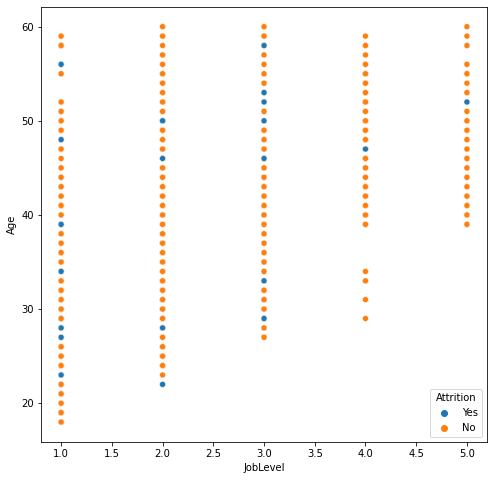

In [81]:
# 1. Multivariate - Age, JobLevel on Attrition
plt.figure(figsize=(8,8))
sns.scatterplot(x='JobLevel',y='Age',hue='Attrition',data=input_df)


In [82]:
#Above shows that there is more attrition at Level 1.  As and when Level goes up and Age increases the attrition is reduced
#However, maximum attrition is seen in Level 1 and Level 3 irrespective of the Age

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

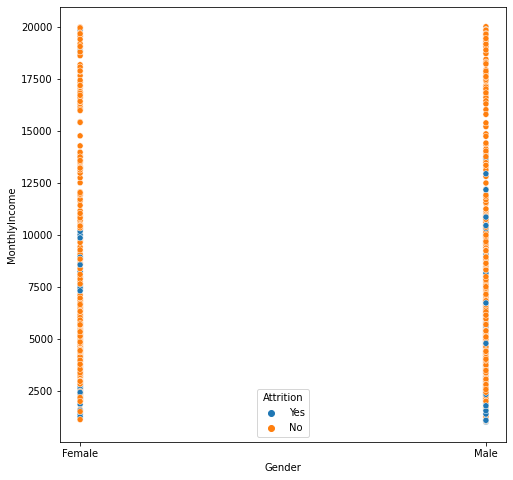

In [83]:
# 2. Gender vs MonthlyIncome on Attrition
plt.figure(figsize=(8,8))
sns.scatterplot(x='Gender',y='MonthlyIncome',hue='Attrition',data=input_df)

In [84]:
#Above analysis shows that Males at lower Monthly income levels tend to show higher attrition compared to Females

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='MonthlyIncome'>

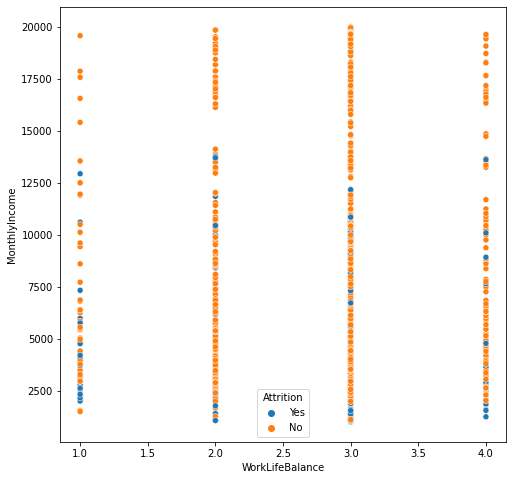

In [85]:
# 3. WorkLifeBalance vs MonthlyIncome on Atrrition
plt.figure(figsize=(8,8))
sns.scatterplot(x='WorkLifeBalance',y='MonthlyIncome',hue='Attrition',data=input_df)

In [86]:
#Above shows some interesting trend.  Irrespective of a high worklife balance, Attrition is seen at various monthly income levels

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

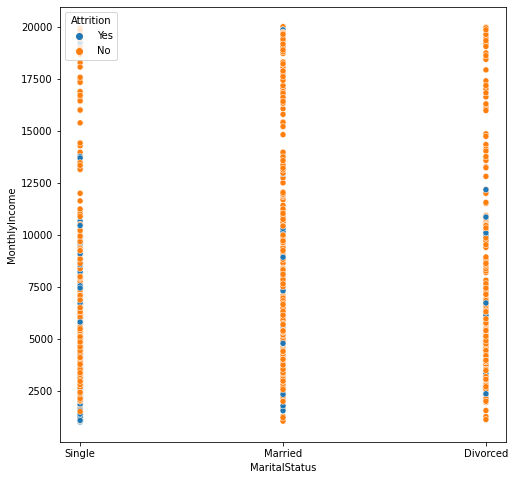

In [87]:
# 4. MaritalStatus vs MonthlyIncome on Attrition
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',data=input_df)

In [88]:
# Above shows that Single employees tend to show attrition at all monthly income ranges, while for Married, they dont 
# show attrition beyond 10000 per month.  Divorced tend to show attrition till 12500, but not beyond that

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

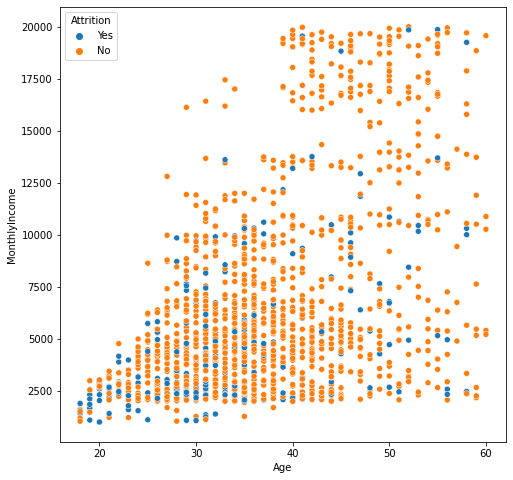

In [89]:
# 5. Age vs MonthlyIncome on Attrition
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='MonthlyIncome',hue='Attrition',data=input_df)

In [90]:
#Above shows that upto 30 years, there is attrition seen more at lesser monthly incomes
#Also, over 30 yrs the attrition is seen only when the monthly income is less than 12500

<AxesSubplot:>

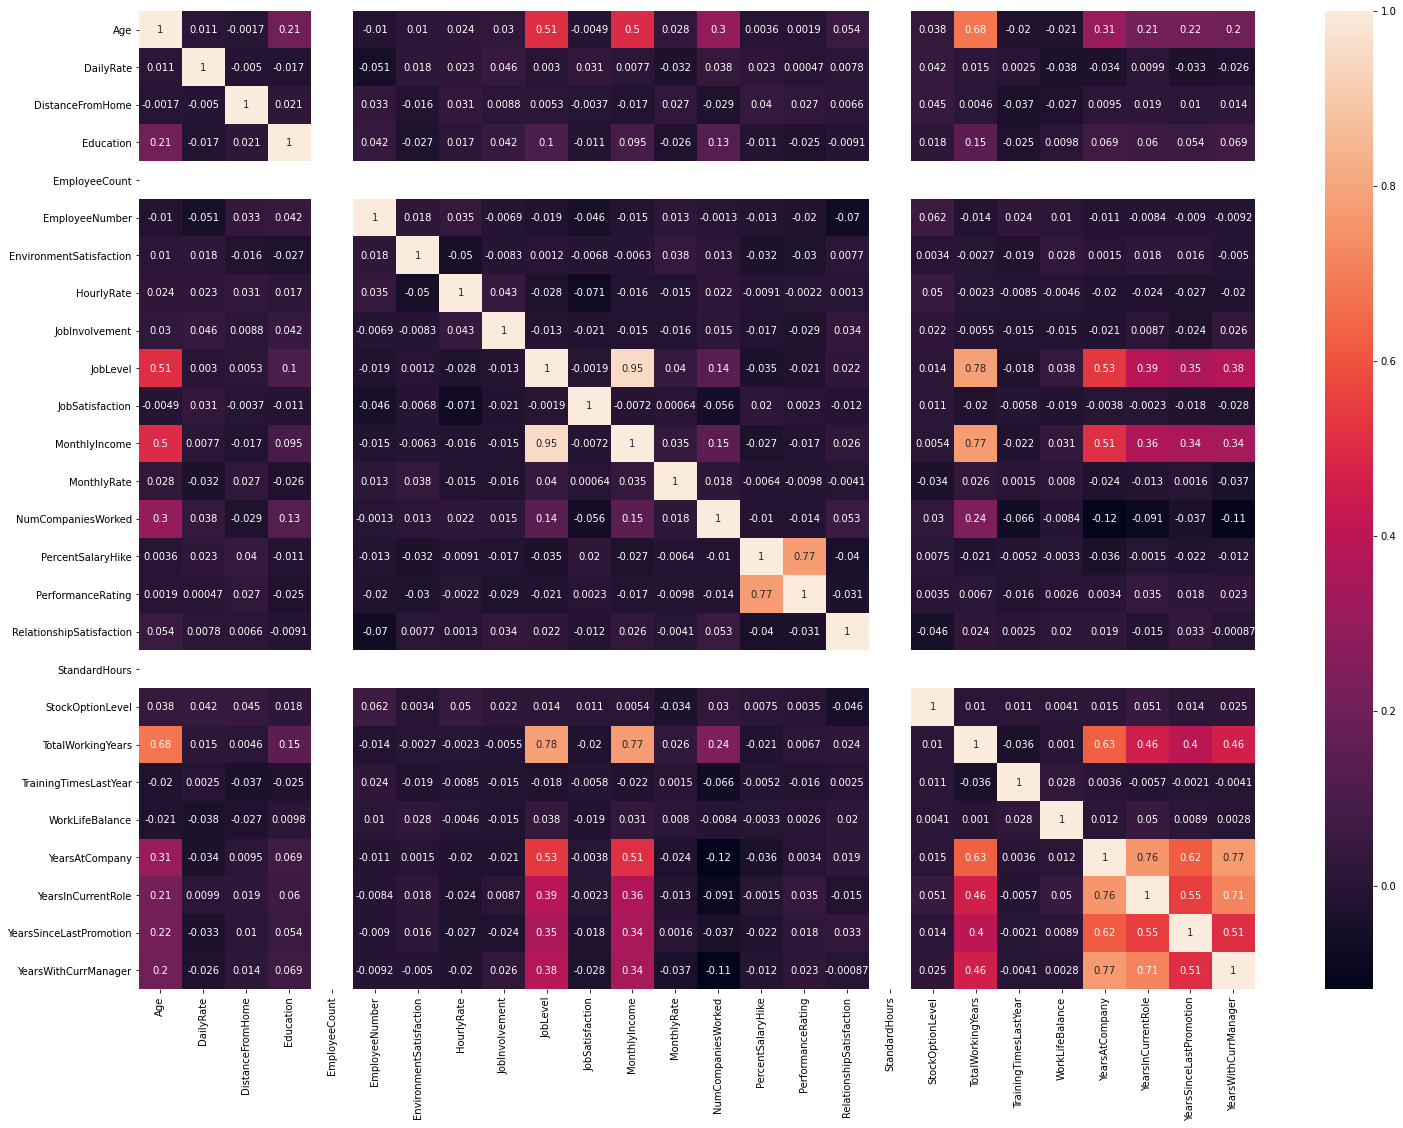

In [91]:
#Lets draw the heatmap
plt.figure(figsize=(25,18))
sns.heatmap(input_df.corr(),annot=True)

In [92]:
# 1. There seems to be high correlation between features MonthlyIncome and JobLevel
# 2. Correlation exists between YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, TotalWorkingyears
# The correlation seems to display multicollinearity.  This needs to be taken care of

In [93]:
#Feature Engineering
# From the dataset it appears that the below columns can be dropped
# EmployeeNumber, StandardHours, Over18, EmployeeCount
input_df.drop(['EmployeeNumber','StandardHours','Over18','EmployeeCount'],axis=1,inplace=True)

# Lets encode the categorical type data, which is Attrition
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
ord_enc=OrdinalEncoder()
lab_enc=LabelEncoder()

for i in input_df.columns:
    if input_df[i].dtypes=='O' and i!='Attrition':
        input_df[i]=ord_enc.fit_transform(input_df[i].values.reshape(-1,1))

#Encoding label column with label encoder
input_df['Attrition']=lab_enc.fit_transform(input_df['Attrition'])


In [94]:
#Since we say many outliers during the bi-variate analysis, lets try to address it

#First lets choose the proper threshold for outlier correction
def get_threshold(zsc):
    for i in np.arange(3,5,0.2):
        data=input_df.copy()
        data=data[(zsc<i).all(axis=1)]
        loss=(input_df.shape[0]-data.shape[0])/input_df.shape[0]*100
        print('Data loss is at {}% for threshold {}'.format(np.round(loss,2),np.round(i,1)))
  

In [95]:
#Lets use zscore method to remove the outliers
from scipy.stats import zscore
zsc=np.abs(zscore(input_df))
get_threshold(zsc)

Data loss is at 5.65% for threshold 3.0
Data loss is at 4.22% for threshold 3.2
Data loss is at 3.13% for threshold 3.4
Data loss is at 2.72% for threshold 3.6
Data loss is at 1.77% for threshold 3.8
Data loss is at 0.88% for threshold 4.0
Data loss is at 0.68% for threshold 4.2
Data loss is at 0.34% for threshold 4.4
Data loss is at 0.27% for threshold 4.6
Data loss is at 0.14% for threshold 4.8


In [96]:
#We can choose threshold at some value less than 4% of data loss, say around 3.4
input_df=input_df[(zsc<3.4).all(axis=1)]

In [97]:
#Next step is to remove skewness in the trends which we observed in bi-variate analysis
# Skewness needs to be removed for the continuous variables.  However it is observed that MonthlyIncome
# needs a special treatment

# we can use square root method to remove the skewness first (not applicable for MonthlyIncome so we exclude it)
for i in continuous_data:
    if np.abs(input_df[i].skew())>0.5 and i!='MonthlyIncome':
        input_df[i]=np.sqrt(input_df[i])


In [98]:
#Using log method to remove skewness from Monthly income
input_df['MonthlyIncome']=np.log(input_df['MonthlyIncome']) 

In [99]:
for i in continuous_data:
    print(input_df[i].skew())

0.45161719780360593
-0.0099792467518277
0.3955605785857213
-0.03151658235828881
0.30662120616070093
0.024508336284755135
0.1119968888661742
0.15508819581753688


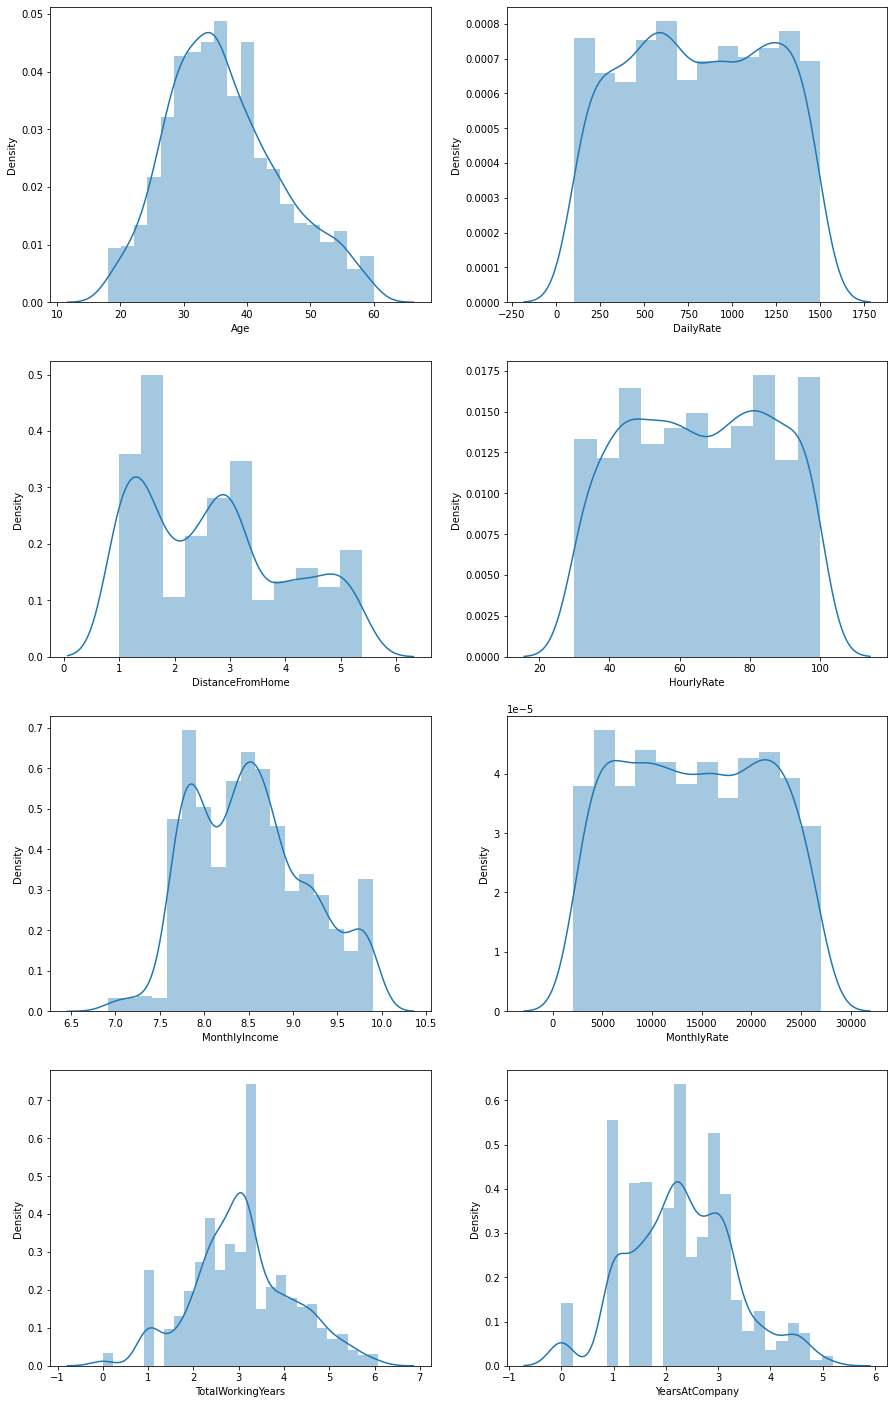

In [100]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
recur=0
count=0
for i,n in enumerate(continuous_data):
    if i%2==0 and i>0:
        recur+=1
        count=0
    sns.distplot(input_df[n],ax=ax[recur,count])
    count+=1

In [101]:
#Above shows that all continuous data has been almost corrected for skewness

In [102]:
#Before we feature engineer, it is nice to seperate the dependent and independent variables
#Lets make a copy of input dataset and go for the seperation
x=input_df.copy()
x.drop('Attrition',axis=1,inplace=True)
y=input_df['Attrition']

In [103]:
#Let us also handle the imbalance of data
#we perform the over sampling using SMOTE
from imblearn.over_sampling import SMOTE
ov_sam=SMOTE()
x,y=ov_sam.fit_resample(x,y)

1    1194
0    1194
Name: Attrition, dtype: int64

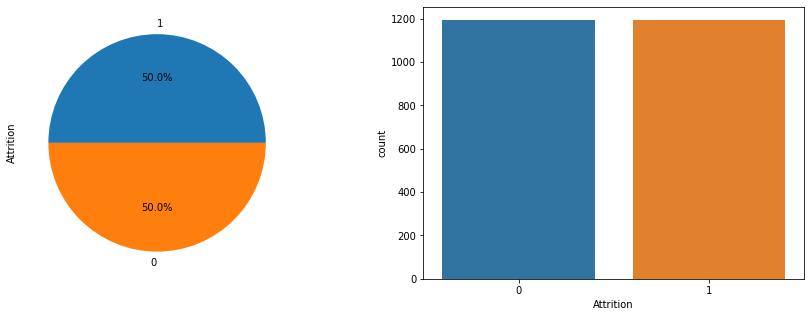

In [104]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

In [105]:
#Above shows that the label class is balanced and hence the data

In [106]:
#Now lets proceed and scale the data since we have the balance.  we use the min max scaler for this
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [107]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [108]:
#Modelling
# we are going to try quite a few classification models due to the nature of the dataset.  Lets import them
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [109]:
#Lets implement few helper functions which can be used for all the models.  we get the random state using LogisticRegression
#The first helper required is to find the random state
def get_random_state(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j


In [110]:
#Lets now split the data into training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=get_random_state(x,y))

In [111]:
#Helper to evaluate the performance of each model given as an input
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [112]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [113]:
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,testy,model,testx,score) 

In [114]:
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7889
----------------------------------------------------------
Mean of Cross Validation Score 0.7739
----------------------------------------------------------
AUC_ROC Score 0.8905
----------------------------------------------------------
Confusion Matrix
[[208  47]
 [ 79 263]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       255
           1       0.85      0.77      0.81       342

    accuracy                           0.79       597
   macro avg       0.79      0.79      0.79       597
weighted avg       0.80      0.79      0.79       597

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.876
----------------------------------------------------------
Mean of Cross Validation Score 0.8773
----

In [115]:
#Based on the above results, it appears that SVC along with ensemble techniques as below perform very well
# Random Forest
# Gradient Boost
# Xtreme Gradient Boost

#Now lets perform hyperparameter tuning on these models and see which one performs the best

In [116]:
#Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

#For Random Forest
params={'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}



In [117]:
grid_res=GridSearchCV(RandomForestClassifier(),params,cv=5)


In [118]:
grid_res.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [119]:
print(grid_res.best_params_)
print(grid_res.best_estimator_)
print(grid_res.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 400}
RandomForestClassifier(max_features='log2', n_estimators=400)
0.9279827578157827


In [120]:
m=RandomForestClassifier(max_features='log2', n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ RandomForestClassifier(max_features='log2', n_estimators=500) ------------------------------------
Accuracy 0.9564
----------------------------------------------------------
Mean of Cross Validation Score 0.931
----------------------------------------------------------
AUC_ROC Score 0.9823
----------------------------------------------------------
Confusion Matrix
[[282  21]
 [  5 289]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       303
           1       0.93      0.98      0.96       294

    accuracy                           0.96       597
   macro avg       0.96      0.96      0.96       597
weighted avg       0.96      0.96      0.96       597



In [121]:
# Gradient Boost
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}


In [122]:
grid_res=GridSearchCV(GradientBoostingClassifier(),params,cv=5)

In [123]:
grid_res.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 1]})

In [124]:
print(grid_res.best_params_)
print(grid_res.best_estimator_)
print(grid_res.best_score_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.5}
GradientBoostingClassifier(max_depth=9, n_estimators=400, subsample=0.5)
0.939697483699289


In [125]:
gbc_res=GradientBoostingClassifier(max_depth=10, n_estimators=400, subsample=0.5)
gbc_res.fit(xtrain,ytrain)
p=gbc_res.predict(xtest)
score=cross_val_score(gbc_res,x,y,cv=10)
performance(p,ytest,gbc_res,xtest,score)

------------------------------------ GradientBoostingClassifier(max_depth=10, n_estimators=400, subsample=0.5) ------------------------------------
Accuracy 0.9531
----------------------------------------------------------
Mean of Cross Validation Score 0.931
----------------------------------------------------------
AUC_ROC Score 0.987
----------------------------------------------------------
Confusion Matrix
[[281  22]
 [  6 288]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       303
           1       0.93      0.98      0.95       294

    accuracy                           0.95       597
   macro avg       0.95      0.95      0.95       597
weighted avg       0.95      0.95      0.95       597



In [126]:
#Xtreme Gradient Boost
from sklearn.model_selection import RandomizedSearchCV

params={
 "learning_rate"    : [0.01,0.05, 0.10, 0.15, ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [127]:
rscv_res=RandomizedSearchCV(XGBClassifier(),params,cv=10)

In [128]:
rscv_res.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [129]:
print(rscv_res.best_params_)
print(rscv_res.best_estimator_)
print(rscv_res.best_score_)

{'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9296430788330229


In [130]:
res_xgbc=XGBClassifier(colsample_bytree=0.4, gamma= 0.1, learning_rate= 0.15, max_depth= 10, min_child_weight= 1)
res_xgbc.fit(xtrain,ytrain)
p=res_xgbc.predict(xtest)
score=cross_val_score(res_xgbc,x,y,cv=10)
performance(p,ytest,res_xgbc,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.9397
----------------------------------------------------------
Mean of Cross Validation Score 0.9218
----------------------------------------------------------
AUC_ROC Score 0.9783
----------------------------------------------------------
Confusion Matrix
[[279  28]
 [  8 282]]
------------------------------------------------------

In [133]:
#SVC
params={'C':[1,10,20],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4]}

In [134]:
res_rscv=RandomizedSearchCV(SVC(probability=True),params,cv=10)

In [135]:
res_rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=SVC(probability=True),
                   param_distributions={'C': [1, 10, 20],
                                        'degree': [1, 2, 3, 4],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [136]:
print(res_rscv.best_params_)
print(res_rscv.best_estimator_)
print(res_rscv.best_score_)

{'kernel': 'rbf', 'degree': 2, 'C': 20}
SVC(C=20, degree=2, probability=True)
0.9162631905648665


In [137]:
svc_res=SVC(C=10, degree=1, probability=True)
svc_res.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(svc_res,x,y,cv=10)
performance(p,ytest,svc_res,xtest,score)

------------------------------------ SVC(C=10, degree=1, probability=True) ------------------------------------
Accuracy 0.9564
----------------------------------------------------------
Mean of Cross Validation Score 0.9301
----------------------------------------------------------
AUC_ROC Score 0.9851
----------------------------------------------------------
Confusion Matrix
[[282  21]
 [  5 289]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       303
           1       0.93      0.98      0.96       294

    accuracy                           0.96       597
   macro avg       0.96      0.96      0.96       597
weighted avg       0.96      0.96      0.96       597



In [138]:
#As seen from the above model results, Xtreme Gradient Boost shows a good performance.  Also, since the difference between
#accuracy score and mean cross validation score is minimum among all the models, this guarantees less variances in result

In [139]:
#Finalizing the model

model_final=XGBClassifier(colsample_bytree=0.4, gamma= 0.1, learning_rate= 0.15, max_depth= 10, min_child_weight= 1)
model_final.fit(xtrain,ytrain)
pred_res=model_final.predict(xtest)
score=cross_val_score(model_final,x,y,cv=10)

In [140]:
#Evaluation metrics

performance(pred_res,ytest,model_final,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.9397
----------------------------------------------------------
Mean of Cross Validation Score 0.9218
----------------------------------------------------------
AUC_ROC Score 0.9783
----------------------------------------------------------
Confusion Matrix
[[279  28]
 [  8 282]]
------------------------------------------------------

In [142]:
fpred=pd.Series(model_final.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

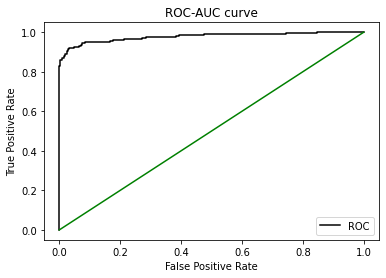

In [143]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='g',linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

In [145]:
#Saving the model
import joblib
joblib.dump(model_final,'IBM-HR-Analytics.obj')


['IBM-HR-Analytics.obj']